# Analysis of Gavekal China Fixed Income Performance

### Importing dependencies and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

**Links:** download at least 5 years of data.

https://www.boursorama.com/bourse/devises/taux-de-change-euro-yuanrenminbi-EUR-CNY/

https://www.boursorama.com/bourse/opcvm/cours/0P0000WLAC/

Where are we?

In [2]:
pwd

'C:\\Users\\hp98\\gavekalcapital_chinafixedincome_tracking\\tracking'

## I. Fund Performance

In [3]:
# importing data

gkcfi = pd.read_csv('GAVEKALCHINAFIXEDINCOMEUCITSAEUR_2020-11-17.txt',
                    sep='\t', header=0, parse_dates=True, dayfirst=True, index_col=0)

columns = gkcfi.columns
gkcfi.head(), gkcfi.tail()

(               ouv    haut     bas    clot  vol devise  Unnamed: 7
 date                                                              
 2016-11-03  146.41  146.41  146.41  146.41    0    EUR         NaN
 2016-11-04  146.10  146.10  146.10  146.10    0    EUR         NaN
 2016-11-07  146.88  146.88  146.88  146.88    0    EUR         NaN
 2016-11-08  146.61  146.61  146.61  146.61    0    EUR         NaN
 2016-11-09  147.49  147.49  147.49  147.49    0    EUR         NaN,
                ouv    haut     bas    clot  vol devise  Unnamed: 7
 date                                                              
 2020-11-06  164.52  164.52  164.52  164.52    0    EUR         NaN
 2020-11-09  164.79  164.79  164.79  164.79    0    EUR         NaN
 2020-11-10  165.20  165.20  165.20  165.20    0    EUR         NaN
 2020-11-11  165.31  165.31  165.31  165.31    0    EUR         NaN
 2020-11-12  164.94  164.94  164.94  164.94    0    EUR         NaN)

In [4]:
gkcfi.drop(columns[[0, 1, 2, 4, 5, 6]], axis=1, inplace=True) # clean the data (all columns are the same or empty)
gkcfi.tail()

,clot
date,
2020-11-06,164.52
2020-11-09,164.79
2020-11-10,165.20
2020-11-11,165.31
2020-11-12,164.94


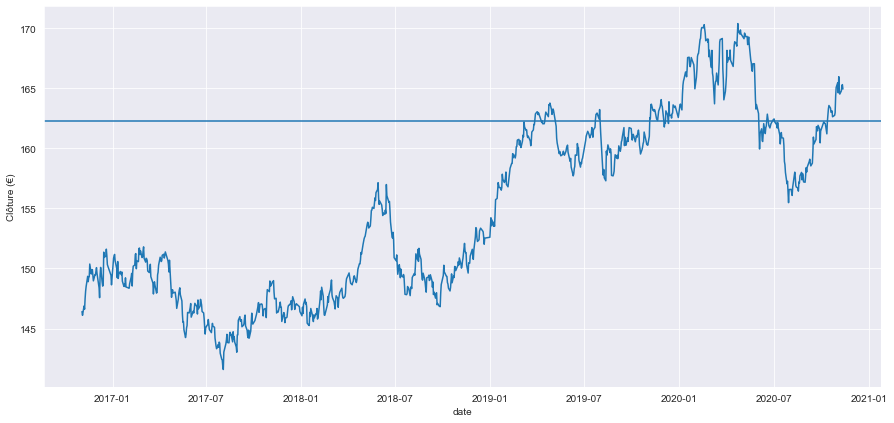

In [5]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
graph = sns.lineplot(data=gkcfi, x='date', y='clot')
graph.axhline(162.32)
plt.ylabel('Clôture (€)'); # plot the NAV

In [6]:
df_invested = gkcfi['2019-11-10':] # slide the df to start at the investment date

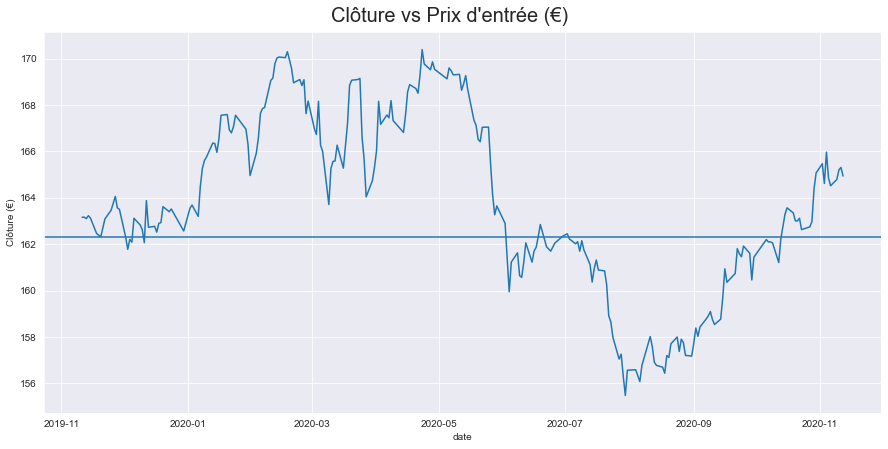

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
graph = sns.lineplot(data=df_invested, x='date', y='clot')
graph.axhline(162.32)
plt.ylabel('Clôture (€)')
plt.figtext(.5,.9,"Clôture vs Prix d'entrée (€)", fontsize=20, ha='center');

In [8]:
perf = 100 * df_invested['clot'] / df_invested['clot'][0]
df_final = pd.concat([df_invested, perf], axis=1) # add a performance column w.r.t. the investment date
df_final.columns = ['clot', 'perf']

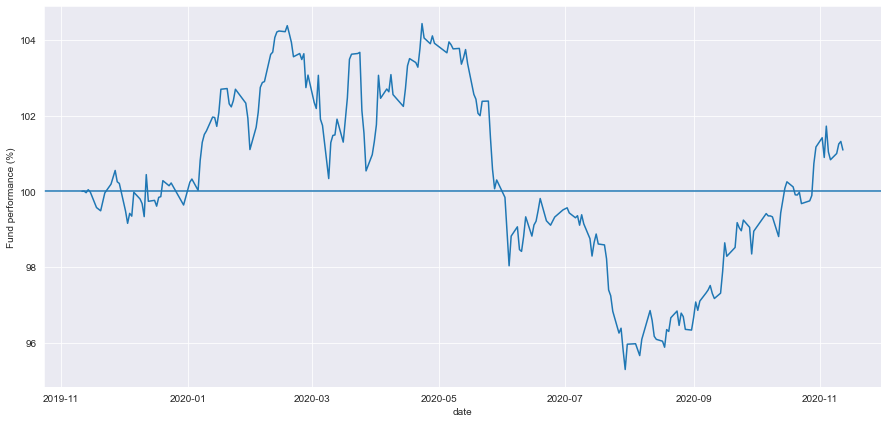

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
graph = sns.lineplot(data=df_final, x='date', y='perf')
graph.axhline(100)
plt.ylabel('Fund performance (%)'); # plot the performance

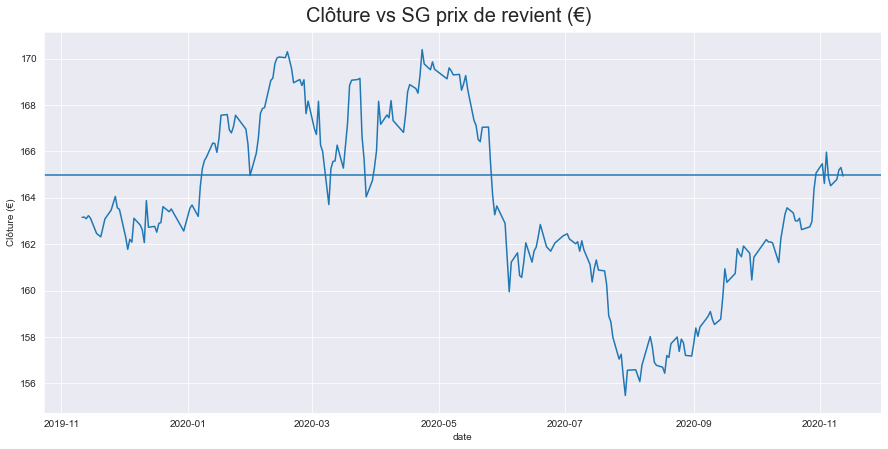

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
graph = sns.lineplot(data=df_invested, x='date', y='clot')
graph.axhline(165.00396)
plt.ylabel('Clôture (€)')
plt.figtext(.5,.9,'Clôture vs SG prix de revient (€)', fontsize=20, ha='center');

## II. CNYEUR exchange rate

In [11]:
# importing data

eurcny = pd.read_csv('EURCNYSPOT_2020-11-17.txt',
                    sep='\t', header=0, parse_dates=True, dayfirst=True, index_col=0)
columns_fx = eurcny.columns
eurcny.head(), eurcny.tail()

(              ouv   haut    bas   clot  vol  devise  Unnamed: 7
 date                                                           
 2015-11-17  6.808  6.812  6.781  6.797    0     NaN         NaN
 2015-11-18  6.789  6.827  6.781  6.807    0     NaN         NaN
 2015-11-19  6.813  6.872  6.803  6.851    0     NaN         NaN
 2015-11-20  6.847  6.847  6.792  6.818    0     NaN         NaN
 2015-11-23  6.814  6.817  6.768  6.795    0     NaN         NaN,
               ouv   haut    bas   clot  vol  devise  Unnamed: 7
 date                                                           
 2020-11-10  7.832  7.841  7.791  7.820    0     NaN         NaN
 2020-11-11  7.821  7.824  7.785  7.812    0     NaN         NaN
 2020-11-12  7.811  7.825  7.789  7.807    0     NaN         NaN
 2020-11-13  7.807  7.828  7.805  7.818    0     NaN         NaN
 2020-11-16  7.821  7.829  7.783  7.806    0     NaN         NaN)

In [12]:
eurcny.drop(columns[[0, 1, 2, 4, 5, 6]], axis=1, inplace=True) # clean the data (all columns are the same or empty)
eurcny.tail()

,clot
date,
2020-11-10,7.820
2020-11-11,7.812
2020-11-12,7.807
2020-11-13,7.818
2020-11-16,7.806


In [13]:
eurcny.clot = 1/eurcny.clot  # Reversing the exchange rate yields the CNYEUR rate
eurcny.tail()

,clot
date,
2020-11-10,0.127877
2020-11-11,0.128008
2020-11-12,0.128090
2020-11-13,0.127910
2020-11-16,0.128107


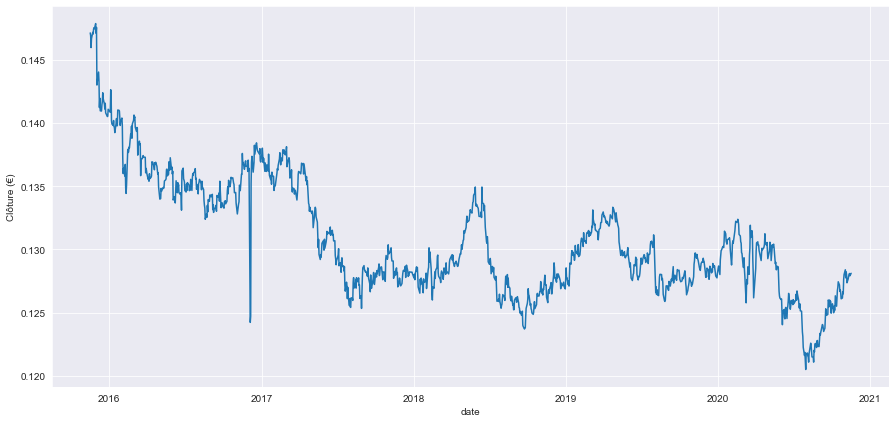

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
graph = sns.lineplot(data=eurcny, x='date', y='clot')
plt.ylabel('Clôture (€)'); # plot the NAV

In [15]:
fx_invested = eurcny['2019-11-10':] # slide the df to start at the investment date

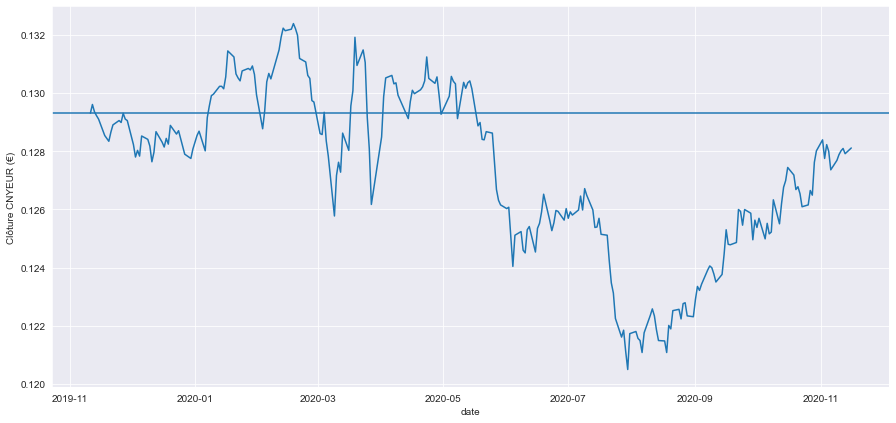

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
graph = sns.lineplot(data=fx_invested, x='date', y='clot')
graph.axhline(0.1293)
plt.ylabel('Clôture CNYEUR (€)');

In [17]:
perf = 100 * fx_invested['clot'] / fx_invested['clot'][0]
fx_final = pd.concat([fx_invested, perf], axis=1) # add a performance column w.r.t. the investment date
fx_final.columns = ['clot', 'perf']

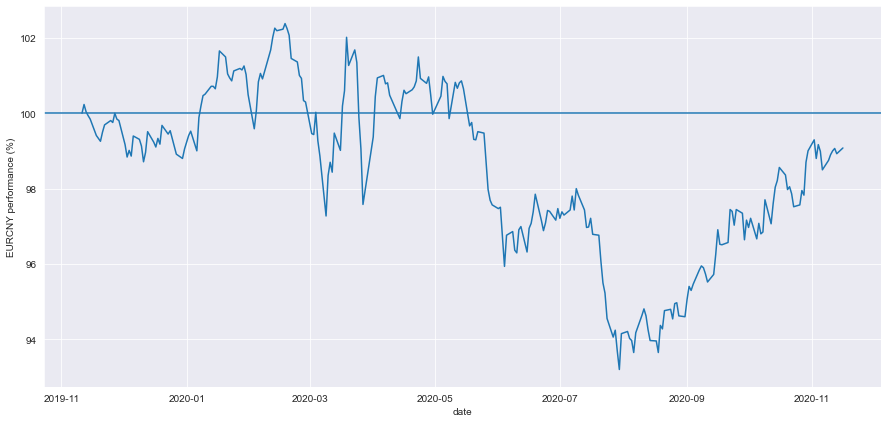

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
graph = sns.lineplot(data=fx_final, x='date', y='perf')
graph.axhline(100)
plt.ylabel('EURCNY performance (%)'); # plot the performance

## III. Correlation

In [19]:
df_final.shape

(239, 2)

In [20]:
fx_final.shape

(260, 2)

In [21]:
df_cor = df_final.merge(fx_final, how='inner', left_index=True, right_index=True, suffixes=['_fund', '_fx'])
df_cor

,clot_fund,perf_fund,clot_fx,perf_fx
date,,,,
2019-11-11,163.16,100.000000,0.129299,100.000000
2019-11-12,163.17,100.006129,0.129601,100.233281
2019-11-13,163.10,99.963226,0.129349,100.038805
2019-11-14,163.23,100.042903,0.129216,99.935392
2019-11-15,163.13,99.981613,0.129099,99.845081
...,...,...,...,...
2020-11-06,164.52,100.833538,0.127356,98.497198
2020-11-09,164.79,100.999019,0.127681,98.748723
2020-11-10,165.20,101.250306,0.127877,98.900256


In [22]:
clot_c, p = pearsonr(df_cor.clot_fund, df_cor.clot_fx)
print(f"Fund vs CNYEUR clot Pearson Correlation: {clot_c:.2f}\n")

Fund vs CNYEUR clot Pearson Correlation: 0.94



In [23]:
perf_c, p = pearsonr(df_cor.perf_fund, df_cor.perf_fx)
print(f"Fund vs CNYEUR performance Pearson Correlation: {perf_c:.2f}\n")
print(f'Are both correlation coefficients equal? {clot_c == perf_c}')

Fund vs CNYEUR performance Pearson Correlation: 0.94

Are both correlation coefficients equal? False


In [24]:
# Fund over- or underperformance vs CNYEUR

delta = df_cor.perf_fund[-1] - df_cor.perf_fx[-1]
print(f'By how much did both performances differ? By {delta:.2f}%')

By how much did both performances differ? By 2.03%


**Git commit reminder**

git cd 'pathname'

git push -u origin master

git commit -am 'commit'

git checkout master

git push origin master